# Assignment

In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from jax import grad
import jax.numpy as jnp

###  Q1


The number of multiplications involved in a matrix multiplication between a (n, k) and (k, m) matrix are (k)*(m)*(n),
this can be justified as matrices are multiplied using row by column rule. Thus, the k elements in first row of first matrix is multiplied with the k elememts in the first column of second matrix involving k multiplications, for the first element. For the first row, the total multiplications will be equal to number of columns in second matrix, giving k*m multiplications. These are performed for each row of first matrix, giving k*m*n.

All multiplication results for a particular cell are added and placeed at that cell. There are k multiplications for a element, thus, (k-1) additions. For the first row, the total additions will be equal to number of columns in second matrix, giving (k-1)*m additions. These are performed for each row of first matrix, giving (k-1)*m*n additions.

No. of multiplications = k*m*n
No. of additions = (k-1)*m*n

### Q2


In [3]:
#matrix multiplication code
def matrix_mult(m1,m2):
    n = len(m1)
    k = len(m1[0])
    k2 = len(m2)
    m = len(m2[0])
    ans = np.zeros((n,m))
    if(k != k2):
        print("The matrix multiplication is not defined!")
        return -1
    for i in range(n):
        for j in range(m):
            for t in range(k):
                ans[i][j] += (m1[i][t] * m2[t][j])
    return ans


In [4]:
#numpy matrix mult
def np_mult(m1,m2):
    return np.matmul(m1,m2)


In [5]:
#test code
m1 = np.random.rand(25,50)
m2 = np.random.rand(50,24)

start = time.time()
my_mul = matrix_mult(m1,m2)
end = time.time()
print("Time taken in my matrix multiplication is: ", end-start)
#print(my_mul)

start = time.time()
np_mul = np_mult(m1,m2)
end = time.time()
print("Time taken in inbuilt matrix multiplication is: ", end-start)
#print(np_mul)

Time taken in my matrix multiplication is:  0.1088557243347168
Time taken in inbuilt matrix multiplication is:  0.09690713882446289


Numpy multiplication is better as evident from the time taken above. The numpy logic is O(n^(2.37188)) time, while our logic is O(n^3) time. Thus, numpy implementation is better.
After three iterations, the mean of the time difference is 0.47 seconds.

### Q3

In [6]:
def get_median_method1(arr):
    n = len(arr)
    a = arr
    med = 0
    #can also be done for n/2 times, to get the median.
    for i in range(n):
        m = a[0]
        ind = 0
        for j in range(n-i):
            if(a[j] > m):
                m = a[j]
                ind = j
        a[ind],a[n-i-1] = a[n-i-1],a[ind]
    x = (int)(n/2)
    if(n%2 != 0):
        med = a[x]
    else:
        med = (a[x-1] + a[x])/2
    return med


In [7]:
def get_median_method2(arr):
    n = len(arr)
    a = arr
    a.sort()
    med = 0
    x = (int)(n/2)
    if(n%2 != 0):
        med = a[x]
    else:
        med = (a[x-1] + a[x])/2
    return med

In [34]:
arr = np.random.rand(50)

start = time.time()
med = get_median_method1(arr)
end = time.time()
print("Time taken in method 1 is", end-start)
print("median is ", med)

start = time.time()
med = get_median_method2(arr)
end = time.time()
print("Time taken in method 2 is", end-start)
print("median is ", med)

start = time.time()
med = np.median(arr)
end = time.time()
print("Time taken in numpy method is", end-start)
print("median is ", med)

Time taken in method 1 is 0.008015871047973633
median is  0.41495794052060037
Time taken in method 2 is 0.0
median is  0.41495794052060037
Time taken in numpy method is 0.0
median is  0.41495794052060037


The time complexity in method1 is O(n^2), while in method2 is O(nlogn). The numpy method also finds the median in O(nlogn) using the quicksort. Thus, method2 is better.

 ### Q4

The gradient of the function is: (2xy+(y^3)*cosx)i + ((x^2)+3*(y^2)*sinx)j

### Q5

In [9]:
# Estimating gradient at (pi/2,1)
# For y=1,
def fun(x,y):
    return (x*x*y) + (y**3)*jnp.sin(x)


In [10]:
df_dx = grad(fun,argnums=0)
df_dy = grad(fun,argnums=1)

print(df_dx(1.0,1.0),df_dy(1.0,1.0))


2.5403023 3.524413


### Q6

In [11]:
from sympy import *

In [12]:
def func(x,y):
    return (x*x*y) + (y*y*y*sin(x))

In [13]:
x = Symbol('x')
y = Symbol('y')

def diff_x(x,y):
  return diff(func(x,y),x)

def diff_y(x,y):
  return diff(func(x,y),y)

print(diff_x(x,y))
print(diff_y(x,y))


2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


### Q7

In [14]:
ACAD_YEAR = ['2022','2023','2024','2025']
BRANCH = ['Branch1', 'Branch2']
STUDENT = {
    "Name" : None,
    "Roll Number" : None,
    "Marks" : {
        "English" : 0,
        "Maths" : 0,
        "Computing": 0
    }
}
students_record = {}
roll = 1
i=0
for y in ACAD_YEAR:
    students_record[y] = {}
    for br in BRANCH:
        st = STUDENT
        st['Name'] = "N"
        st['Roll Number'] = roll
        st['Marks']['English'] = 70
        st['Marks']['Maths'] = 100
        st['Marks']['Computing'] = 96
        students_record[y][br] = st.copy()
        i+=1
        roll += 1
    
print(students_record)

{'2022': {'Branch1': {'Name': 'N', 'Roll Number': 1, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}, 'Branch2': {'Name': 'N', 'Roll Number': 2, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}}, '2023': {'Branch1': {'Name': 'N', 'Roll Number': 3, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}, 'Branch2': {'Name': 'N', 'Roll Number': 4, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}}, '2024': {'Branch1': {'Name': 'N', 'Roll Number': 5, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}, 'Branch2': {'Name': 'N', 'Roll Number': 6, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}}, '2025': {'Branch1': {'Name': 'N', 'Roll Number': 7, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}, 'Branch2': {'Name': 'N', 'Roll Number': 8, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}}}


### Q8

In [15]:
database = []
class Year:
    def __init__(self,year,branch_list):
        self.year = year
        self.branches = branch_list
        
class Branch: 
    def __init__(self,branch,student_list):
        self.branch = branch
        self.students = student_list
        
Students = []
for i in range(3):
    st = STUDENT
    st['Name'] = "N"
    st['Roll Number'] = i+1
    st['Marks']['English'] = 70
    st['Marks']['Maths'] = 100
    st['Marks']['Computing'] = 96
    Students.append(st.copy())

b1 = Branch("Branch1",Students)
b2 = Branch("Branch2",Students)
br = [b1,b2]

for y in ACAD_YEAR:
    obj = Year(y,br)
    database.append(obj)

l = len(database)
for i in range(l):
    print(database[i].year,end = " ")
    for br in database[i].branches:
        print(br.branch,end=" ")
        for st in br.students:
            print(st)

2022 Branch1 {'Name': 'N', 'Roll Number': 1, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 2, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 3, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
Branch2 {'Name': 'N', 'Roll Number': 1, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 2, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 3, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
2023 Branch1 {'Name': 'N', 'Roll Number': 1, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 2, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 3, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
Branch2 {'Name': 'N', 'Roll Number': 1, 'Marks': {'English': 70, 'Maths': 100, 'Computing': 96}}
{'Name': 'N', 'Roll Number': 2, 'Marks': {'English': 70, 'Maths': 10

### Q9

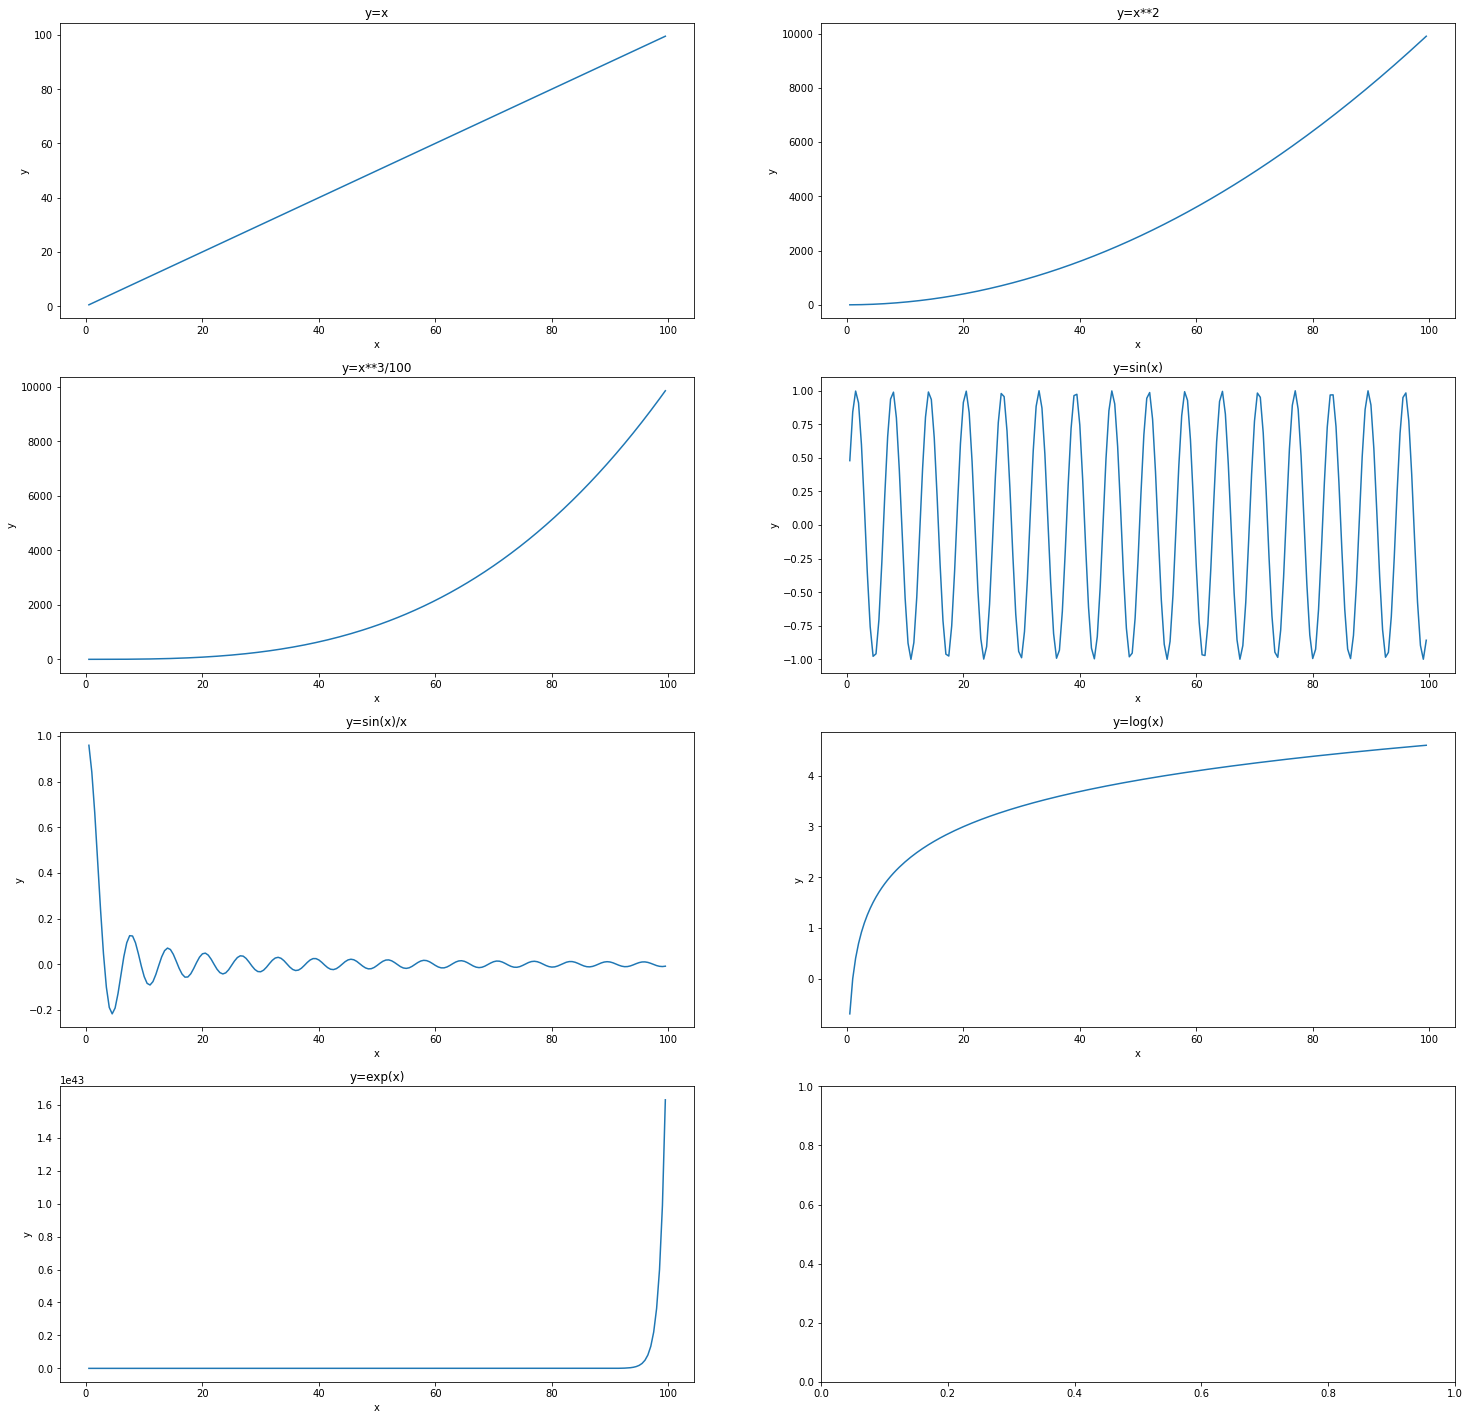

In [16]:
x = np.arange(0.5,100,0.5)

f,ax=plt.subplots(4,2,figsize=(25,25))
ax = ax.flat
#1
y = x
ax[0].plot(x,y)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("y=x")

#2
y = x*x
ax[1].plot(x,y)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("y=x**2")


#3
y = (x**3)/100
ax[2].plot(x,y)
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
ax[2].set_title("y=x**3/100")

#4
y = np.sin(x)
ax[3].plot(x,y)
ax[3].set_xlabel("x")
ax[3].set_ylabel("y")
ax[3].set_title("y=sin(x)")

#5
y = np.sin(x)/x
ax[4].plot(x,y)
ax[4].set_xlabel("x")
ax[4].set_ylabel("y")
ax[4].set_title("y=sin(x)/x")

#6
y = np.log(x)
ax[5].plot(x,y)
ax[5].set_xlabel("x")
ax[5].set_ylabel("y")
ax[5].set_title("y=log(x)")

#7
y = np.exp(x)
ax[6].plot(x,y)
ax[6].set_xlabel("x")
ax[6].set_ylabel("y")
ax[6].set_title("y=exp(x)")

plt.show()

### Q10

In [17]:
data = np.random.uniform(1,2,(20,5))

In [18]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,1.289323,1.753346,1.001993,1.719225,1.347877
1,1.026212,1.420536,1.250315,1.514038,1.751278
2,1.515054,1.622091,1.597838,1.373069,1.134622
3,1.830376,1.706542,1.744539,1.084350,1.198904
4,1.366258,1.129108,1.183269,1.431268,1.443987
5,1.848123,1.455708,1.946872,1.767298,1.237549
6,1.761243,1.043400,1.676241,1.987794,1.854343
7,1.024909,1.944670,1.116765,1.467832,1.407855
8,1.836371,1.911032,1.778188,1.444245,1.585590
9,1.292301,1.329945,1.998828,1.984495,1.236244


In [19]:
#Renaming columns
df.columns = ['a', 'b', 'c','d','e']
df

,a,b,c,d,e
0,1.289323,1.753346,1.001993,1.719225,1.347877
1,1.026212,1.420536,1.250315,1.514038,1.751278
2,1.515054,1.622091,1.597838,1.373069,1.134622
3,1.830376,1.706542,1.744539,1.084350,1.198904
4,1.366258,1.129108,1.183269,1.431268,1.443987
5,1.848123,1.455708,1.946872,1.767298,1.237549
6,1.761243,1.043400,1.676241,1.987794,1.854343
7,1.024909,1.944670,1.116765,1.467832,1.407855
8,1.836371,1.911032,1.778188,1.444245,1.585590
9,1.292301,1.329945,1.998828,1.984495,1.236244


In [20]:
#column with highest standard deviation
m = 0
c = None
for col in df.columns:
    x = df[col].std()
    if(x > m):
        m = x
        c = col
print("maximum standard deviation: ", m)

maximum standard deviation:  0.3145183505408857


In [21]:
#row with lowest mean
m = min(df.mean(1))
for row in df.iloc:
    if(df.iloc[row.name].mean() == m):
        print("min row: ", row.name)
        break

min row:  4


### Q11

In [22]:
#Adding column f
if(f in df.columns):
    df.drop(['f'],axis = 1,inplace = True)
df['f'] = df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.289323,1.753346,1.001993,1.719225,1.347877,7.111764
1,1.026212,1.420536,1.250315,1.514038,1.751278,6.962379
2,1.515054,1.622091,1.597838,1.373069,1.134622,7.242674
3,1.830376,1.706542,1.744539,1.084350,1.198904,7.564711
4,1.366258,1.129108,1.183269,1.431268,1.443987,6.553890
5,1.848123,1.455708,1.946872,1.767298,1.237549,8.255551
6,1.761243,1.043400,1.676241,1.987794,1.854343,8.323021
7,1.024909,1.944670,1.116765,1.467832,1.407855,6.962031
8,1.836371,1.911032,1.778188,1.444245,1.585590,8.555426
9,1.292301,1.329945,1.998828,1.984495,1.236244,7.841812


In [24]:
#g column
df.loc[df['f'] < 8, 'g'] = 'LT8'
df.loc[df['f'] >= 8, 'g'] = 'GT8'
df

,a,b,c,d,e,f,g
0,1.289323,1.753346,1.001993,1.719225,1.347877,7.111764,LT8
1,1.026212,1.420536,1.250315,1.514038,1.751278,6.962379,LT8
2,1.515054,1.622091,1.597838,1.373069,1.134622,7.242674,LT8
3,1.830376,1.706542,1.744539,1.084350,1.198904,7.564711,LT8
4,1.366258,1.129108,1.183269,1.431268,1.443987,6.553890,LT8
5,1.848123,1.455708,1.946872,1.767298,1.237549,8.255551,GT8
6,1.761243,1.043400,1.676241,1.987794,1.854343,8.323021,GT8
7,1.024909,1.944670,1.116765,1.467832,1.407855,6.962031,LT8
8,1.836371,1.911032,1.778188,1.444245,1.585590,8.555426,GT8
9,1.292301,1.329945,1.998828,1.984495,1.236244,7.841812,LT8


In [25]:
ans = (df['g']=='LT8').sum()
ans

13

### Q12

In [26]:
A = np.zeros((3,3))
B = np.array([1,2,3])

print("A Shape is:" , A.shape)
print("B Shape is", B.shape)
sum = A + B
print(sum)
print("It does not give any error due to broadcasting of the second array into 3*3 array automatically by numpy")

A Shape is: (3, 3)
B Shape is (3,)
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
It does not give any error due to broadcasting of the second array into 3*3 array automatically by numpy


### Q13

In [27]:
def argmin(arr):
    ind = 0
    min = arr[0]
    l = len(arr)
    for i in range(l):
        if(arr[i] < min):
            min = arr[i]
            ind = i
    return ind

In [28]:
a = np.random.rand(50)

my_func_i = argmin(a)
inbuilt_i = np.argmin(a)
print("My func argmin: ", my_func_i)
print("inbuilt argmin: ", inbuilt_i)

My func argmin:  22
inbuilt argmin:  22
